In [ ]:
# RUN THIS
import spacy
from collections import Counter
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

NLP = spacy.load('en_core_web_sm')

#! wget https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip
#! unzip stylometry-federalist.zip
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

madison = NLP(federalist_by_author['Madison'])
hamilton = NLP(federalist_by_author['Hamilton'])
jay = NLP(federalist_by_author['Jay'])
disputed = NLP(federalist_by_author['Disputed'])


In [ ]:
! pip install -U spacy

In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
import spacy
NLP = spacy.load('en_core_web_sm')

In [ ]:
text = "Me and my friend went to the Univeristy of Bucharest. We were not very happy about that."

In [ ]:
doc = NLP(text)

In [ ]:
list(doc.noun_chunks)

[Me, my friend, the Univeristy, Bucharest, We, that]

In [ ]:
nc = list(doc.noun_chunks)
chunk = nc[0]

In [ ]:
type(chunk)

spacy.tokens.span.Span

In [ ]:
type(doc[:3])

spacy.tokens.span.Span

In [ ]:
print(chunk.start_char, chunk.end_char)
print(chunk.start, chunk.end)


0 2
0 1


In [ ]:
doc.text[chunk.start_char:chunk.end_char] # character offset

'Me'

In [ ]:
doc[chunk.start : chunk.end] #pozitii numarate ca tokeni

Me

In [ ]:
list(doc.sents)

[Me and my friend went to the Univeristy of Bucharest.,
 We were not very happy about that.]

In [ ]:
type(list(doc.sents)[0])

spacy.tokens.span.Span

In [ ]:
! wget https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip

In [ ]:
! unzip stylometry-federalist.zip

In [ ]:
ls data

ls: cannot access 'data': No such file or directory


In [ ]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}


In [ ]:
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)


In [ ]:
federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)


In [ ]:
federalist_by_author.keys()

dict_keys(['Madison', 'Hamilton', 'Jay', 'Shared', 'Disputed', 'TestCase'])

In [ ]:
federalist_by_author['Madison']

In [ ]:
madison = NLP(federalist_by_author['Madison'])
len(madison)

47464

In [276]:
y

[2, 4, 6, 8, 10]

In [ ]:
madison

## Tema
1. numarati cuvinte din fiecare document procesat cu spacy hint: collections Counter, sau scikit-learn.CountVectorizer
2. selectati o lista cu cele mai frecvente 10 cuvinte
3. sau selectati liste de cuvinte cu anumite proprietati: conjuntii, prepozitii, adjective, token.is_stop, token.is_punct, ents, len(sentence), len(token)
4. plotati frecventele cuvintelor sau orice alte proprietati vreti sa extrageti din hamilton, madison si disputed
5. folositi bar-chart plotly ca sa vedeti rezultatul intr-un mod interactiv

In [ ]:
from collections import Counter

In [ ]:
hamilton = NLP(federalist_by_author['Hamilton'])
jay = NLP(federalist_by_author['Jay'])

In [235]:
def filter_words(doc):
  words = {}
  str_words = {}
  # print(len(doc))
  for word in doc:
    if word.is_alpha:
      # print(word, word.text)
      wordtext = word.text
      if wordtext != wordtext.lower() and wordtext.lower() in str_words:
        str_words[wordtext.lower()] += 1
      if wordtext not in str_words:
        str_words[wordtext] = 1
      else:
        str_words[wordtext] += 1
        # print(words[word], str_words[wordtext])
  aux = {}
  for word in doc:
    if word.is_alpha:
      if word.text not in aux:
        aux[word.text] = 1
        words[word] = str_words[word.text]
  return words


In [247]:
def filter_words_str(doc):
  str_words = []
  # print(len(doc))
  for word in doc:
    if word.is_alpha:
      if word.text != word.text.lower() and word.text.lower() in str_words:
        str_words.append(word.text.lower())
      else:
        str_words.append(word.text)
  return str_words

In [225]:
disputed = NLP(federalist_by_author['Disputed'])

In [226]:
madison_words = filter_words(madison)
hamilton_words = filter_words(hamilton)
jay_words = filter_words(jay)
disputed_words = filter_words(disputed)

In [214]:
len(madison_words), len(hamilton_words), len(jay_words)

(4631, 7770, 1542)

In [ ]:
madison_words, hamilton_words, jay_words

In [227]:
top_madison = [x for (x,y) in sorted(madison_words.items(), key=lambda item: item[1], reverse=True)[:10]]
top_hamilton = [x for (x,y) in sorted(hamilton_words.items(), key=lambda item: item[1], reverse=True)[:10]]
top_jay = [x for (x,y) in sorted(jay_words.items(), key=lambda item: item[1], reverse=True)[:10]]
top_disputed = [x for (x,y) in sorted(disputed_words.items(), key=lambda item: item[1], reverse=True)[:10]]

In [228]:
top_madison, top_hamilton, top_jay, top_disputed

([the, of, to, and, in, a, be, that, it, is],
 [the, of, to, in, and, a, be, that, it, is],
 [the, and, of, to, in, it, that, be, or, a],
 [the, of, to, and, be, in, a, that, it, which])

In [266]:
str_hamilton = filter_words_str(hamilton) # sau Counter(filter_words_str(hamilton))
str_madison = filter_words_str(madison)
str_disputed = filter_words_str(disputed)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hamilton_plot_text = " ".join(str_hamilton)
wordcloud = WordCloud(width=800, height=400).generate(hamilton_plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [ ]:
madison_plot_text = " ".join(str_madison)
wordcloud = WordCloud(width=800, height=400).generate(madison_plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [ ]:
disputed_plot_text = " ".join(str_disputed)
wordcloud = WordCloud(width=800, height=400).generate(disputed_plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [270]:
frecv_str_hamilton = Counter(str_hamilton)
frecv_str_madison = Counter(str_madison)
frecv_str_disputed = Counter(str_disputed)

In [268]:
frecv_str_hamilton['General']

1

In [ ]:
import plotly.express as px
import pandas as pd

cuvinte = list(set(str_hamilton + str_disputed + str_madison))

count_hamilton = [frecv_str_hamilton[word] for word in cuvinte]
count_madison = [frecv_str_madison[word] for word in cuvinte]
count_disputed = [frecv_str_disputed[word] for word in cuvinte]

data = {
    'Cuvant': cuvinte,
    'Hamilton': count_hamilton,
    'Madison': count_madison,
    'Disputed': count_disputed
}

df = pd.DataFrame(data)

chart = px.bar(df, x='Cuvant', y=['Hamilton', 'Madison', 'Disputed'],
             title='Frecventa cuvintelor', labels={'val': 'frecv'})

chart.show()

Madison:  [the, of, to, and, in, a, be, that, it, is]
Hamilton:  [the, of, to, in, and, a, be, that, it, is]
Jay:  [the, and, of, to, in, it, that, be, or, a]


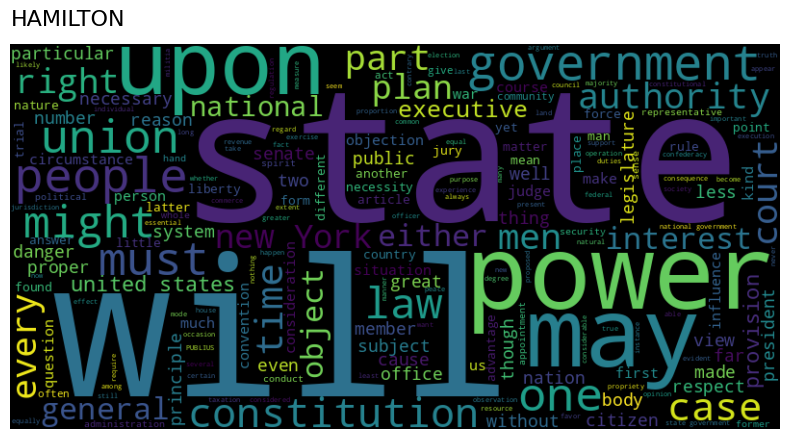

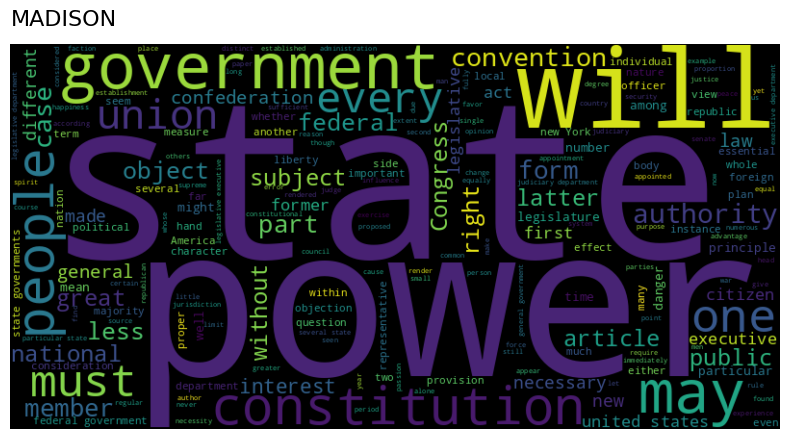

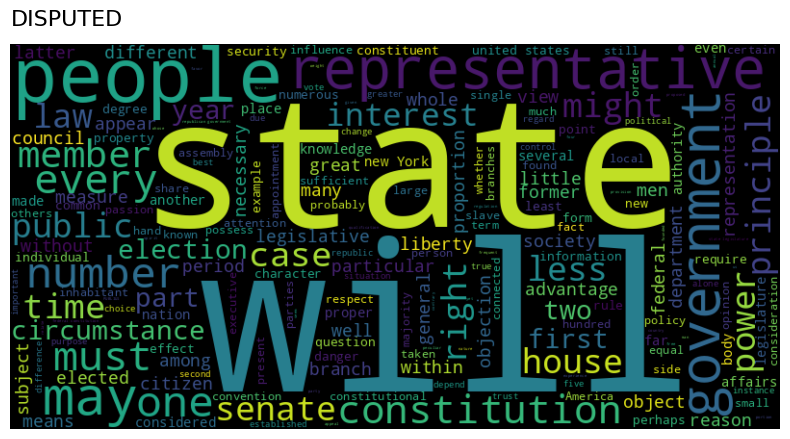

In [277]:
# Rezolvare exercitii
def old_filter_words(doc):
  words = {}
  str_words = {}
  # print(len(doc))
  for word in doc:
    if word.is_alpha:
      # print(word, word.text)
      wordtext = word.text
      if wordtext != wordtext.lower() and wordtext.lower() in str_words:
        str_words[wordtext.lower()] += 1
      if wordtext not in str_words:
        str_words[wordtext] = 1
      else:
        str_words[wordtext] += 1
        # print(words[word], str_words[wordtext])
  aux = {}
  for word in doc:
    if word.is_alpha:
      if word.text not in aux:
        aux[word.text] = 1
        words[word] = str_words[word.text]
  return words


def filter_words(doc):
  words = {}
  str_words = {}
  # print(len(doc))
  for word in doc:
    if word.is_alpha:
      # print(word, word.text)
      wordtext = word.text
      if wordtext != wordtext.lower() and wordtext.lower() in str_words:
        str_words[wordtext.lower()] += 1
      if wordtext not in str_words:
        str_words[wordtext] = 1
      else:
        str_words[wordtext] += 1
        # print(words[word], str_words[wordtext])
  aux = {}
  for word in doc:
    if word.is_alpha:
      if word.text not in aux:
        aux[word.text] = 1
        words[word] = str_words[word.text]
  return words


def filter_words_str(doc):
  str_words = []
  # print(len(doc))
  for word in doc:
    if word.is_alpha:
      if word.text != word.text.lower() and word.text.lower() in str_words:
        str_words.append(word.text.lower())
      else:
        str_words.append(word.text)
  return str_words


# Ex. 1
madison_words = filter_words(madison)
hamilton_words = filter_words(hamilton)
jay_words = filter_words(jay)
disputed_words = filter_words(disputed)


# Ex. 2
top_madison = [x for (x,y) in sorted(madison_words.items(), key=lambda item: item[1], reverse=True)[:10]]
top_hamilton = [x for (x,y) in sorted(hamilton_words.items(), key=lambda item: item[1], reverse=True)[:10]]
top_jay = [x for (x,y) in sorted(jay_words.items(), key=lambda item: item[1], reverse=True)[:10]]
top_disputed = [x for (x,y) in sorted(disputed_words.items(), key=lambda item: item[1], reverse=True)[:10]]
print("Madison: ", top_madison)
print("Hamilton: ", top_hamilton)
print("Jay: ", top_jay)

# Ex. 4
str_hamilton = filter_words_str(hamilton) # sau Counter(filter_words_str(hamilton))
str_madison = filter_words_str(madison)
str_disputed = filter_words_str(disputed)


hamilton_plot_text = " ".join(str_hamilton)
wordcloud = WordCloud(width=800, height=400).generate(hamilton_plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0, -20, 'HAMILTON', fontsize=16, color='black')

plt.show()


madison_plot_text = " ".join(str_madison)
wordcloud = WordCloud(width=800, height=400).generate(madison_plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0, -20, 'MADISON', fontsize=16, color='black')

plt.show()


disputed_plot_text = " ".join(str_disputed)
wordcloud = WordCloud(width=800, height=400).generate(disputed_plot_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0, -20, 'DISPUTED', fontsize=16, color='black')

plt.show()

# Ex. 5
frecv_str_hamilton = Counter(str_hamilton)
frecv_str_madison = Counter(str_madison)
frecv_str_disputed = Counter(str_disputed)


import plotly.express as px
import pandas as pd

cuvinte = list(set(str_hamilton + str_disputed + str_madison))

count_hamilton = [frecv_str_hamilton[word] for word in cuvinte]
count_madison = [frecv_str_madison[word] for word in cuvinte]
count_disputed = [frecv_str_disputed[word] for word in cuvinte]

data = {
    'Cuvant': cuvinte,
    'Hamilton': count_hamilton,
    'Madison': count_madison,
    'Disputed': count_disputed
}

df = pd.DataFrame(data)

chart = px.bar(df, x='Cuvant', y=['Hamilton', 'Madison', 'Disputed'],
             title='Frecventa cuvintelor', labels={'val': 'frecv'})

chart.show()